In [2]:
## need to import the necessary libraries

import pandas as pd # data frame to store the data

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split # train_test_split is used to split the data into a train and test set
from sklearn.metrics import mean_squared_error, r2_score # for evaluation metrics

import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting pairs plot

import numpy as np # many mathematical operations and more, used for sqrt()

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [6]:
## load the data
df = pd.read_csv('ToyotaCorolla.csv')
print(df.head())
print(df.describe())
print(df.columns)
df.shape

   Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5    TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Powered_Windows  \
0         10      2002  46986    Diesel  90          1  ...               1   
1         10      2002  72937    Diesel  90          1  ...               0   
2          9      2002  41711    Diesel  90          1  ...               0   
3          7      2002  48000    Diesel  90          0  ...               0   
4          3      2002  38500    Diesel  90          0  ...               1   

   Power_Steering  Radio  Mistlamps  Sport_Model  Backseat_Divider  \
0         

(1436, 39)

In [4]:
## data preprocessing steps 

df.dropna(inplace = True) # this drops any missing values in the data set 
df['Fuel_Type'] = pd.Categorical(df['Fuel_Type'])
#df = pd.get_dummies(df, columns=['Fuel_Type'] , drop_first=True)


In [5]:
## split the data into training and test datsets 

train_data , test_data = train_test_split ( df, test_size= 0.4 , random_state = 8)

In [6]:
train_data
train_data.describe()


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,...,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,736.399535,10549.879210,56.652729,5.573751,1999.564460,68924.329849,100.894309,0.693380,0.058072,1566.033682,...,0.548200,0.976771,0.152149,0.260163,0.307782,0.768873,0.207898,0.150987,0.004646,0.272938
std,415.695694,3431.519667,18.234683,3.368211,1.503358,37036.077891,14.265236,0.461358,0.234016,191.466956,...,0.497961,0.150717,0.359374,0.438978,0.461844,0.421798,0.406039,0.358245,0.068041,0.445728
min,2.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,380.000000,8400.000000,44.000000,3.000000,1998.000000,43426.000000,86.000000,0.000000,0.000000,1400.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,738.000000,9750.000000,61.000000,5.000000,1999.000000,64000.000000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1103.000000,11695.000000,70.000000,8.000000,2001.000000,88667.000000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,24990.000000,80.000000,12.000000,2004.000000,232940.000000,192.000000,1.000000,1.000000,2000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
sns.pairplot(train_data, diag_kind='kde')
plt.show()

In [ ]:
## need to run a multiple linear regression with Price as the outcome variable 
## use the following predictor variables: Age_08_04, KM, CC, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax,
#  Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar.

predictors = ['Age_08_04', 'KM', 'CC', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
               'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

## seperate X and Y Variables
## create train dataset 
X_train = train_data[predictors].copy()
X_train = pd.get_dummies(X_train, columns=['Fuel_Type'] , drop_first=True)
X_train['Fuel_Type_Diesel'] = X_train['Fuel_Type_Diesel'].astype(int)
X_train['Fuel_Type_Petrol'] = X_train['Fuel_Type_Petrol'].astype(int)
y_train = train_data['Price'].copy()
## create test dataset
X_test = test_data[predictors].copy()
X_test = pd.get_dummies(X_test, columns=['Fuel_Type'] , drop_first=True)
X_test['Fuel_Type_Diesel'] = X_test['Fuel_Type_Diesel'].astype(int)
X_test['Fuel_Type_Petrol'] = X_test['Fuel_Type_Petrol'].astype(int)
y_test = test_data['Price'].copy()

## need to test the dtypes ( convert categorical values to numerical values) 

print(X_train.dtypes)


Age_08_04           int64
KM                  int64
CC                  int64
HP                  int64
Automatic           int64
Doors               int64
Quarterly_Tax       int64
Mfr_Guarantee       int64
Guarantee_Period    int64
Airco               int64
Automatic_airco     int64
CD_Player           int64
Powered_Windows     int64
Sport_Model         int64
Tow_Bar             int64
Fuel_Type_Diesel    int64
Fuel_Type_Petrol    int64
dtype: object


In [8]:
## run the muliple linear regression model 

model_skl = LinearRegression().fit(X_train , y_train)

## want to create a table of coefficients for each predictor variable 
coef_table = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train.columns),
    "Coefficient": [model_skl.intercept_] + list(model_skl.coef_)
})

coef_table

,Variable,Coefficient
0,Intercept,11175.962924
1,Age_08_04,-104.430647
2,KM,-0.016713
3,CC,-2.761234
4,HP,52.510217
5,Automatic,568.705929
6,Doors,188.663241
7,Quarterly_Tax,14.686456
8,Mfr_Guarantee,370.138485
9,Guarantee_Period,86.423043


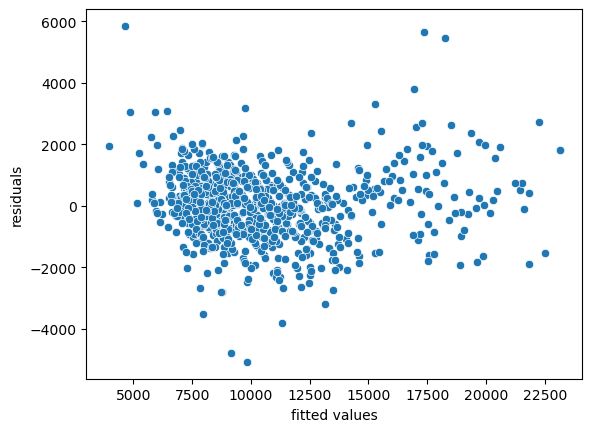

In [9]:
## need to check for obvious model misspecifications by plotting residuals 
## first need to create the residuals 
y_pred = model_skl.predict(X_train)
residuals = y_train - y_pred


## plot the residuals to test if there are obvious model misspecifications 
sns.scatterplot(x=y_pred, y = residuals)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [10]:
## check the three or four most important car specifications for predicting the car's price 
## fit OLS model with statsmodel to get p-values 
model_sm = sm.OLS(y_train , sm.add_constant(X_train)).fit()

## update the coef_table to include p-values from the OLS model 
coef_table['p-Value']= model_sm.pvalues.values
## now that we have updated the coef_table with the p-values we need to remove index 0 containing the intercept
top_four = coef_table.drop(index = 0)
## now that the intercept is removed we can sort the table by p values in ascending order to get the 3 to 4 more important values 
top_four = top_four.sort_values(by = 'p-Value' , ascending=True).head(4)
top_four

,Variable,Coefficient,p-Value
1,Age_08_04,-104.430647,2.540687e-139
11,Automatic_airco,2786.604848,1.599164e-38
2,KM,-0.016713,8.437574e-28
7,Quarterly_Tax,14.686456,8.599628e-15


In [11]:
## personally I would say that the most important car specifications for predicting the car's price are: 
# KM , Age, Mfg_Year

my_predictors = ['KM', 'Age_08_04', 'Mfg_Year']
X_train1 = train_data[my_predictors].copy()
y_train1 = train_data['Price'].copy()
X_test1 = test_data[my_predictors].copy()
y_test1 = test_data['Price'].copy()

## now that the predictors and outcome variable are set up with what I believe are the most important predictors 
my_model_train = LinearRegression().fit(X_train1, y_train1)
my_model_test = LinearRegression().fit(X_test1, y_test1)
model_sm_train = sm.OLS(y_train1 , sm.add_constant(X_train1)).fit()
model_sm_test = sm.OLS(y_test1 , sm.add_constant(X_test1)).fit()

my_coef_table = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train1.columns),
    "Coefficient_Train": [my_model_train.intercept_] + list(my_model_train.coef_),
    "Coefficient_Test": [my_model_test.intercept_] + list(my_model_test.coef_),
    "p-Value_Train": model_sm_train.pvalues.values,
    "p-Value_Test": model_sm_test.pvalues.values
})
my_coef_table


,Variable,Coefficient_Train,Coefficient_Test,p-Value_Train,p-Value_Test
0,Intercept,-2.490242e+06,-4.026109e+06,3.028628e-11,9.648073e-14
1,KM,-1.536695e-02,-1.616487e-02,2.681452e-21,2.610957e-12
2,Age_08_04,-4.932801e+01,5.732275e+00,1.268329e-03,7.933021e-01
3,Mfg_Year,1.252595e+03,2.019234e+03,2.118949e-11,7.295246e-14


In [12]:
## compare the results on the training set vs the test set. A large difference might indicate an outlier in one of the partitions

model_skl_test = LinearRegression().fit(X_test , y_test)
model_smt = sm.OLS(y_test , sm.add_constant(X_test)).fit()

## want to create a table of coefficients for each predictor variable 
coef_table_comp = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train.columns),
    "Coefficient_Train": [model_skl.intercept_] + list(model_skl.coef_),
    "Coefficient_Test": [model_skl_test.intercept_] + list(model_skl_test.coef_),
    "p-Value_Train": model_sm.pvalues.values,
    "p-Value_Test": model_smt.pvalues.values
})
coef_table_comp

## now let us compare the R^2 and RMSE values for both training and test datasets 
y_pred_train = model_skl.predict(X_train)
y_pred_test = model_skl.predict(X_test)

# Compute R² and RMSE
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

summary_table = pd.DataFrame({
    "Dataset":["Training", "Test"],
    "R²":[r2_train, r2_test],
    "RMSE":[rmse_train, rmse_test]
})
summary_table


,Dataset,R²,RMSE
0,Training,0.893367,1119.903539
1,Test,0.704785,2111.039089


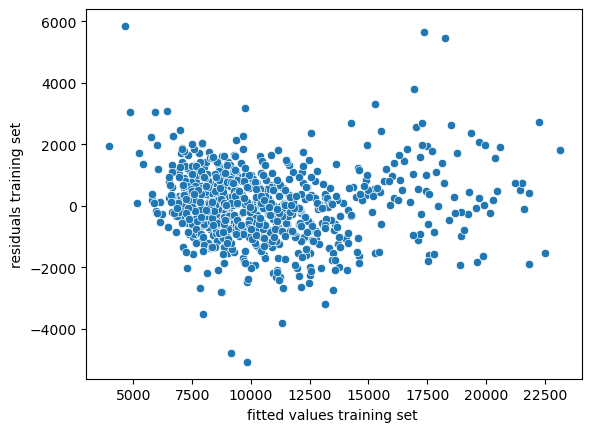

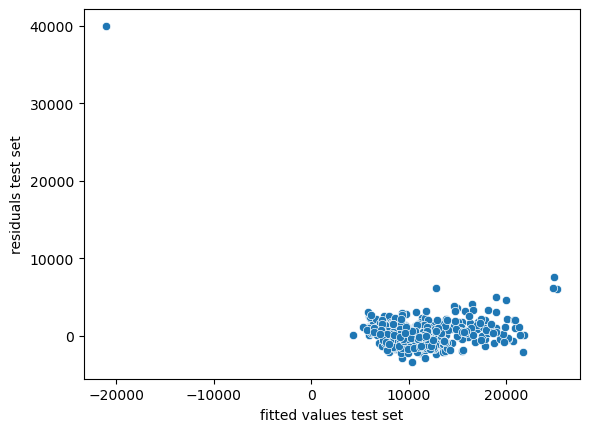

In [14]:
## lets try to plot the residuals to identify potentially extreme records.

## need to check for obvious model misspecifications by plotting residuals 
## first need to create the residuals 
y_pred = model_skl.predict(X_train)
residuals = y_train - y_pred


## plot the residuals to test if there are obvious model misspecifications 
sns.scatterplot(x=y_pred, y = residuals)
plt.xlabel('fitted values training set ')
plt.ylabel('residuals training set')
plt.show()

y_pred_test = model_skl.predict(X_test)
residuals_test = y_test - y_pred_test


## plot the residuals to test if there are obvious model misspecifications 
sns.scatterplot(x=y_pred_test, y = residuals_test)
plt.xlabel('fitted values test set')
plt.ylabel('residuals test set')
plt.show()

In [23]:
## lets sort the residuals from abs largest to smallest to identify potential outliers 
compare_table = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_test,
    "Residual": residuals_test,
    "Abs_Residual": np.abs(residuals_test)
})
compare_table = compare_table.sort_values(by='Abs_Residual', ascending=False)
print(compare_table)

## confirm that the largest residual is in position 0 
print(compare_table.iloc[0])

cleaned_test_df = test_data.drop(index=compare_table.index[0])
print(cleaned_test_df.shape)
## confirmed that one record was removed from the test dataset

      Actual     Predicted      Residual  Abs_Residual
80     18950 -21026.122261  39976.122261  39976.122261
109    32500  24872.526419   7627.473581   7627.473581
110    31000  24816.912314   6183.087686   6183.087686
523    18950  12815.889349   6134.110651   6134.110651
111    31275  25228.832487   6046.167513   6046.167513
...      ...           ...           ...           ...
860     9750   9771.057876    -21.057876     21.057876
1040    9500   9488.239612     11.760388     11.760388
551    10750  10741.338079      8.661921      8.661921
26     17495  17487.827919      7.172081      7.172081
862     9750   9753.900241     -3.900241      3.900241

[575 rows x 4 columns]
Actual          18950.000000
Predicted      -21026.122261
Residual        39976.122261
Abs_Residual    39976.122261
Name: 80, dtype: float64
(574, 39)


In [30]:
## after removing the outlier, let us re-run the model and compare training and test peroformance 
## reason for removing the outlier is that it was an order or manitude larger than the next largest residual

X_test_cleaned = cleaned_test_df[predictors].copy()
X_test_cleaned = pd.get_dummies(X_test_cleaned , columns= ['Fuel_Type'] , drop_first = True)
X_test_cleaned['Fuel_Type_Diesel'] = X_test_cleaned['Fuel_Type_Diesel'].astype(int)
X_test_cleaned['Fuel_Type_Petrol'] = X_test_cleaned['Fuel_Type_Petrol'].astype(int)
y_test_cleaned = cleaned_test_df['Price'].copy()
## now that the cleaned data set is ready - re-run the Multiple Lienar Regression Model
model_skl_cleaned = LinearRegression().fit(X_test_cleaned , y_test_cleaned)
model_sm_cleaned = sm.OLS(y_test_cleaned, sm.add_constant(X_test_cleaned)).fit()


y_pred_train = model_skl.predict(X_train)
y_pred_test = model_skl.predict(X_test)
y_pred_test_cleaned = model_skl_cleaned.predict(X_test_cleaned)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_test_cleaned = r2_score(y_test_cleaned , y_pred_test_cleaned)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_test_cleaned = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_test_cleaned))

summary_table_cleaned = pd.DataFrame({
    "Dataset":["Training", "Test" , "Test Cleaned"],
    "R²":[r2_train, r2_test , r2_test_cleaned],
    "RMSE":[rmse_train, rmse_test , rmse_test_cleaned]
})
summary_table_cleaned



,Dataset,R²,RMSE
0,Training,0.893367,1119.903539
1,Test,0.704785,2111.039089
2,Test Cleaned,0.902387,1210.517078


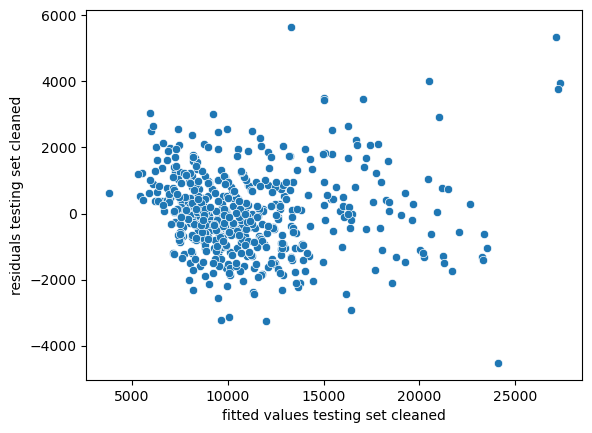

In [32]:
## now that the cleaned data set is ready -- let us re-run the residual plots to see if there are any improvements 
residuals_clean = y_test_cleaned - y_pred_test_cleaned 
sns.scatterplot(x=y_pred_test_cleaned , y = residuals_clean)
plt.xlabel('fitted values testing set cleaned')
plt.ylabel('residuals testing set cleaned')
plt.show()

In [37]:
## let us run feature selection using forward selection
sfs_forward = SFS(LinearRegression(), # type of model
                  k_features=(3, 4), # will find between 1 and 6 features
                  forward=True, # search direction (backwards if False)
                  floating=False, # controls stepwise vs. one direction
                  scoring='neg_root_mean_squared_error', # find max RMSE
                  cv=16) # how many random subsets of data to test

sfs_forward = sfs_forward.fit(X_train, y_train)

best_subset_foward = sfs_forward.subsets_[1]
for v in sfs_forward.subsets_.values():
    if v['avg_score'] > best_subset_foward['avg_score']:
        best_subset_foward = v


print(f'Best score: {- best_subset_foward["avg_score"]:.2f}')
print(f'Best subset (indices): {best_subset_foward["feature_idx"]}')
print(f'Best subset (names): {best_subset_foward["feature_names"]}')

Best score: 1308.65
Best subset (indices): (0, 1, 6, 10)
Best subset (names): ('Age_08_04', 'KM', 'Quarterly_Tax', 'Automatic_airco')


In [34]:
len(predictors)

16

In [ ]:

## let us run feature selection using Backwards selection ( need to finish and fix)
sfs_backward = SFS(LinearRegression(), # type of model
                  k_features=(3,4), # will find between 1 and 6 features
                  forward=False, # search direction (backwards if False)
                  floating=False, # controls stepwise vs. one direction
                  scoring='neg_root_mean_squared_error', # find max RMSE
                  cv=16) # how many random subsets of data to test

sfs_backward = sfs_backward.fit(X_train, y_train)

#best_subset_backwards = sfs_backward.subsets_[1]
for v in sfs_backward.subsets_.values():
    if v['avg_score'] > best_subset_backwards['avg_score']:
        best_subset_backwards = v


print(f'Best score: {- best_subset_backwards["avg_score"]:.2f}')
print(f'Best subset (indices): {best_subset_backwards["feature_idx"]}')
print(f'Best subset (names): {best_subset_backwards["feature_names"]}')

Best score: 1151.28
Best subset (indices): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)
Best subset (names): ('Age_08_04', 'KM', 'CC', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')


In [47]:
## let us run feature selection using stepwise selection 

sfs_step = SFS(LinearRegression(),
               k_features=(3,4),
               forward = True, 
               floating= True , 
               scoring = "neg_root_mean_squared_error", 
               cv=16)

sfs_step = sfs_step.fit(X_train, y_train)

best_subset_step = sfs_step.subsets_[1]
for v in sfs_step.subsets_.values():
    if v['avg_score'] > best_subset_step['avg_score']:
        best_subset_step = v

print(f'Fest score: {- best_subset_step["avg_score"]:.2f}')
print(f'Best subset (indices): {best_subset_step["feature_idx"]}')
print(f'Best subset (names): {best_subset_step["feature_names"]}')

Fest score: 1308.65
Best subset (indices): (0, 1, 6, 10)
Best subset (names): ('Age_08_04', 'KM', 'Quarterly_Tax', 'Automatic_airco')


In [ ]:
## now let us test to see how well the selected model performs 

final_predictors = ['Age_08_04', 'KM', 'Quarterly_Tax', 'Automatic_airco']

